In [1]:
library(tidyverse)
theme_set(theme_classic(base_size = 20))

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
chemicals = bind_rows(
    "2.10^4 molecules" = read.table("detailed_detailed/output/injection1/chemicals.out", header = TRUE, check.names = FALSE),
    "10^6 molecules" = read.table("detailed_detailed/output/injection2/chemicals.out", header = TRUE, check.names = FALSE),
    "No tetracyclin" = read.table("detailed_detailed/output/normal/chemicals.out", header = TRUE, check.names = FALSE),
    .id = "dataset"
)

In [3]:
head(chemicals)

dataset,time,rna_tracker,protein_tracker,dATP,dCTP,dGTP,dTTP,ATP,CTP,...,U726,U727,U728,U733,U734,30S,50S,70S,pre_translocation_70S,translocating_70S
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2.10^4 molecules,0,0,0,100000000,100000000,100000000,100000000,4200000,120000,...,0,0,0,0,0,18000,18000,0,0,0
2.10^4 molecules,10,42,8,99993228,99995342,99995219,99993574,4200000,120000,...,0,0,0,0,0,13556,17956,35,0,4
2.10^4 molecules,20,201,264,99985440,99989045,99988725,99985595,4200000,120000,...,0,0,0,0,0,12961,17361,502,0,65
2.10^4 molecules,30,391,1187,99977540,99982714,99982557,99977719,4200000,120000,...,0,0,0,0,0,11515,15915,1611,0,240
2.10^4 molecules,40,578,3218,99970218,99977176,99977071,99970152,4200000,120000,...,0,0,0,0,0,9512,13912,3100,0,486
2.10^4 molecules,50,755,6707,99962863,99971652,99971549,99963026,4200000,120000,...,0,0,0,0,0,7006,11406,5099,0,738


In [4]:
chemicals %>%
    group_by(dataset) %>%
    summarize(max(time))

dataset,max(time)
<chr>,<int>
10^6 molecules,600
2.10^4 molecules,600
No tetracyclin,3000


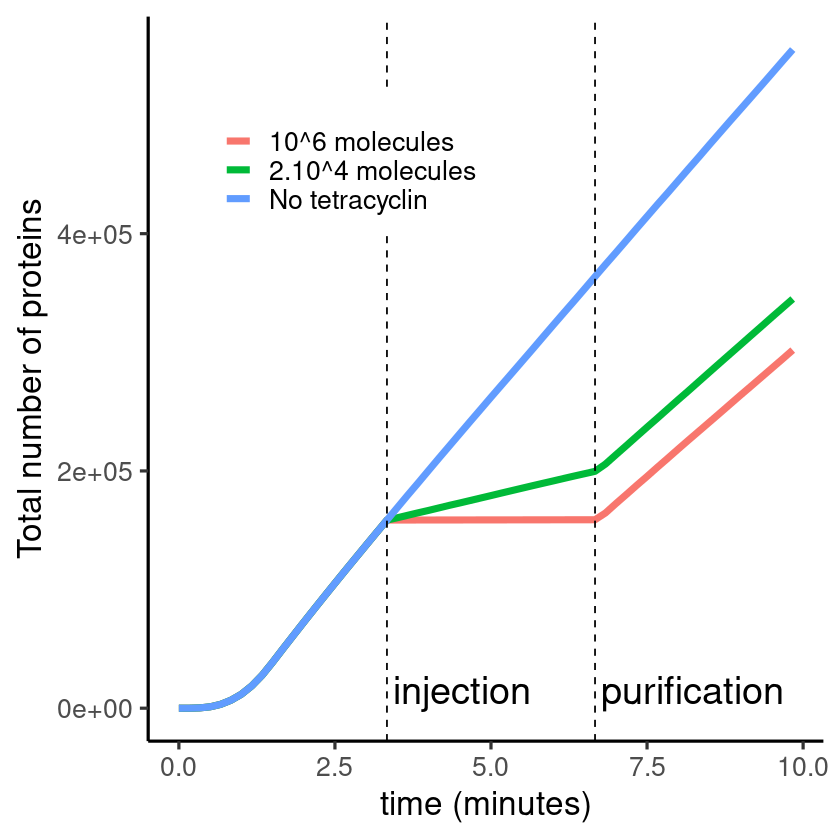

In [5]:
chemicals %>%
    filter(time < 600) %>%
    ggplot(aes(x = time/60, y= protein_tracker, col = dataset)) +
        geom_line(size = 2) +
        geom_vline(xintercept = 200/60, linetype = "dashed") +
        annotate("text", x = 200/60 + 0.1, y = 15000, label = "injection", hjust = 0, size = 8) +    
        geom_vline(xintercept = 400/60, linetype = "dashed") +
        annotate("text", x = 400/60 + 0.1, y = 15000, label = "purification", hjust = 0, size = 8) +    
        labs(x = "time (minutes)", y = "Total number of proteins", color = NULL) +
        theme(legend.position = c(0.3,0.8))

In [6]:
ggsave("tcn_proteins.pdf")

Saving 6.67 x 6.67 in image


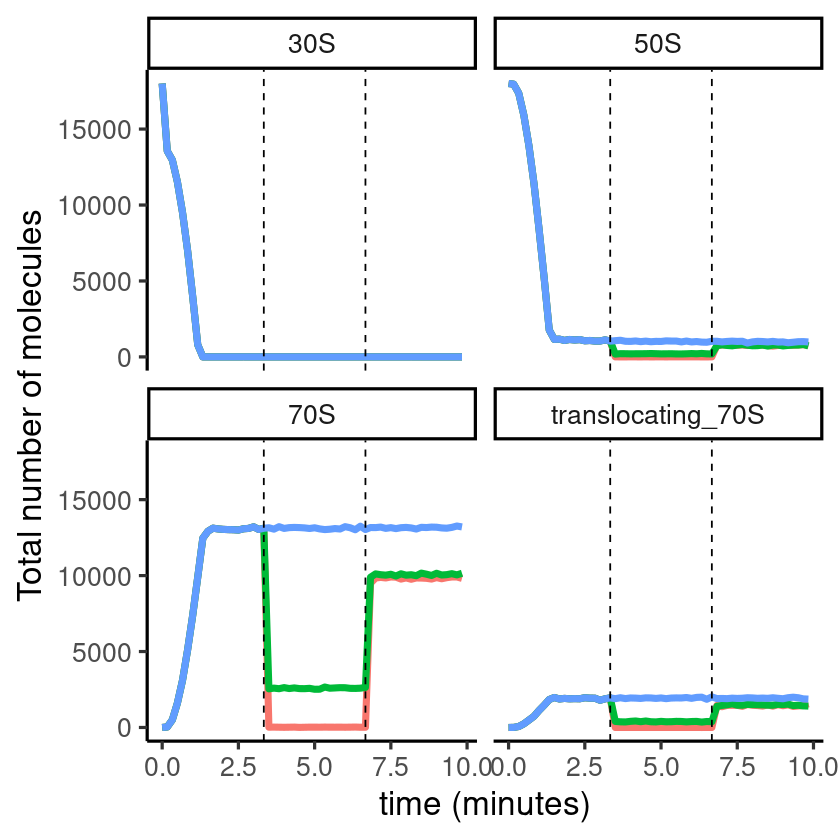

In [8]:
chemicals %>%
    filter(time < 600) %>%
    select(time, dataset, "70S", "50S", "30S", "translocating_70S") %>%
    gather("molecule", "count", -time, -dataset) %>%
    ggplot(aes(x = time/60, y = count, col = dataset)) +
        geom_line(size = 2) +
        geom_vline(xintercept = 200/60, linetype = "dashed") +
        geom_vline(xintercept = 400/60, linetype = "dashed") +
        facet_wrap(. ~ molecule) +
        labs(x = "time (minutes)", y = "Total number of molecules", color = NULL) +
        guides(col = FALSE)

In [9]:
ggsave("tcn_detail.pdf")

Saving 6.67 x 6.67 in image
